Goal of this task was to perform analysis on dataset containing search data in three countries on picked time interval.

In [7]:
import pandas
import numpy
import matplotlib.pyplot as plt
import scipy as sp

#accesing the data
poland = pandas.read_csv('multiTimelinePL.csv')
usa = pandas.read_csv('multiTimelineUSA.csv')
gb = pandas.read_csv('multiTimelineGB.csv')

#dataframe modiciations
list_of_dfs = [(poland, 'PL'), (usa, 'USA'), (gb, 'GB')]
list_df_final = []
for k in list_of_dfs:
    df = k[0]
    code = k[1]
    df = df.dropna()
    df[f'Month'] = pandas.to_datetime(df['Miesiąc'])
    df = df.drop(columns=['Miesiąc'])
    cols = list(df.columns)
    cols[0] = f'vacation{code}'
    df.columns = cols
    list_df_final.append(df)

# combine data into one df
final_df = list_df_final[0]
for df in list_df_final[1:]:
    final_df = final_df.merge(df, on='Month', how='outer')
final_df.set_index('Month', inplace=True)

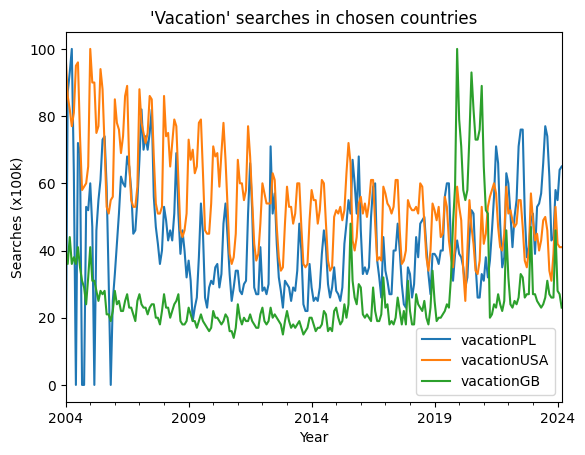

In [9]:
#present time series of all cuntires in one plot
final_df.plot()
plt.title("'Vacation' searches in chosen countries")
plt.legend()
plt.xlabel('Year')
plt.ylabel('Searches (x100k)')
plt.show()

In [10]:
# descriptive statistics
print(final_df.describe())

       vacationPL  vacationUSA  vacationGB
count  243.000000   243.000000  243.000000
mean    43.053498    55.609053   26.641975
std     16.886141    14.889658   14.145912
min      0.000000    25.000000   14.000000
25%     30.500000    45.000000   19.000000
50%     40.000000    53.000000   22.000000
75%     53.500000    62.000000   27.000000
max    100.000000   100.000000  100.000000


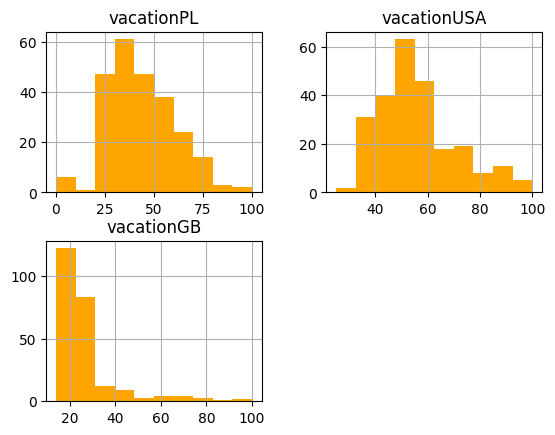

In [18]:
# show three histograms in one plot
final_df.hist(color='orange')
plt.show()

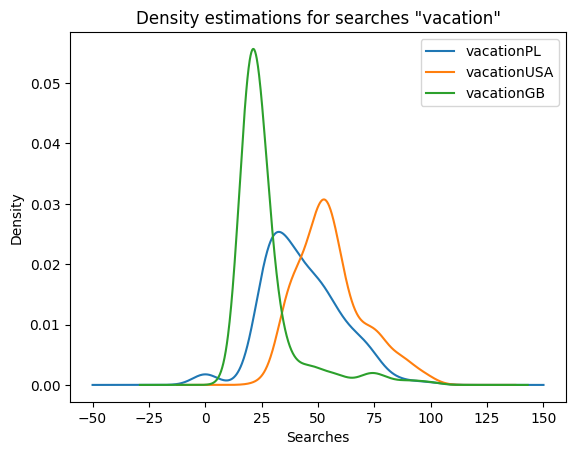

In [16]:
# show three kernel density estimations in one plot
final_df.plot(kind='kde')
plt.title('Density estimations for searches "vacation"')
plt.legend()
plt.xlabel('Searches')
plt.ylabel('Density')
plt.show()